# DATA CLEANING

In [1]:
import numpy as np
import pandas as pd



#steps in data cleaning:
1.changing inconsistent column names
2.column renaming
3.checking for null values
4.checking for duplicate values
5.Finding outliers and removing it

In [2]:
df = pd.read_csv(r"C:\Users\joice mary\Downloads\port_harcourt__nigeria__4.80678_7.002953_.csv")
df.head()

,correct data,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,26-Jul-21,198,89,50,40.78
1,26-Jul-21,199,89,50,40.09
2,26-Jul-21,200,89,50,37.93
3,26-Jul-21,201,89,50,33.18
4,26-Jul-21,202,89,50,37.84


# 1. changing inconsistent column names

In [3]:
df.columns

Index(['correct data', 'entry_id', 'Temperature_F', 'Humidity_%',
       'PM2.5_ATM_ug/m3'],
      dtype='object')

In [4]:
df.columns = df.columns.str.upper()

In [5]:
df.columns

Index(['CORRECT DATA', 'ENTRY_ID', 'TEMPERATURE_F', 'HUMIDITY_%',
       'PM2.5_ATM_UG/M3'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=25929, step=1)

# 2. renaming column names

In [7]:
df1=df.rename(columns = {'CORRECT DATA' :' ENTRY_DATE'})
df1

,ENTRY_DATE,ENTRY_ID,TEMPERATURE_F,HUMIDITY_%,PM2.5_ATM_UG/M3
0,26-Jul-21,198,89,50,40.78
1,26-Jul-21,199,89,50,40.09
2,26-Jul-21,200,89,50,37.93
3,26-Jul-21,201,89,50,33.18
4,26-Jul-21,202,89,50,37.84
...,...,...,...,...,...
25924,03-Sep-21,26122,78,70,35.43
25925,03-Sep-21,26123,78,70,36.55
25926,03-Sep-21,26124,79,70,38.28
25927,03-Sep-21,26125,79,70,43.05


In [8]:
df1.values

array([['26-Jul-21', 198, 89, 50, 40.78],
       ['26-Jul-21', 199, 89, 50, 40.09],
       ['26-Jul-21', 200, 89, 50, 37.93],
       ...,
       ['03-Sep-21', 26124, 79, 70, 38.28],
       ['03-Sep-21', 26125, 79, 70, 43.05],
       ['03-Sep-21', 26126, 78, 71, 44.86]], dtype=object)

In [9]:
type(df1)

pandas.core.frame.DataFrame

In [10]:
df1.shape

(25929, 5)

In [23]:
df1.dtypes


 ENTRY_DATE         object
ENTRY_ID             int64
TEMPERATURE_F        int64
HUMIDITY_%           int64
PM2.5_ATM_UG/M3    float64
dtype: object

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25929 entries, 0 to 25928
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    ENTRY_DATE      25929 non-null  object 
 1   ENTRY_ID         25929 non-null  int64  
 2   TEMPERATURE_F    25929 non-null  int64  
 3   HUMIDITY_%       25929 non-null  int64  
 4   PM2.5_ATM_UG/M3  25929 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1013.0+ KB


In [12]:
df1.tail()

,ENTRY_DATE,ENTRY_ID,TEMPERATURE_F,HUMIDITY_%,PM2.5_ATM_UG/M3
25924,03-Sep-21,26122,78,70,35.43
25925,03-Sep-21,26123,78,70,36.55
25926,03-Sep-21,26124,79,70,38.28
25927,03-Sep-21,26125,79,70,43.05
25928,03-Sep-21,26126,78,71,44.86


In [14]:
df2=df1.set_index('ENTRY_ID')
df2.head()

,ENTRY_DATE,TEMPERATURE_F,HUMIDITY_%,PM2.5_ATM_UG/M3
ENTRY_ID,,,,
198,26-Jul-21,89,50,40.78
199,26-Jul-21,89,50,40.09
200,26-Jul-21,89,50,37.93
201,26-Jul-21,89,50,33.18
202,26-Jul-21,89,50,37.84


## 3.checking for null values

In [15]:
df2.isnull().sum()

 ENTRY_DATE        0
TEMPERATURE_F      0
HUMIDITY_%         0
PM2.5_ATM_UG/M3    0
dtype: int64

### There is no null values in the given dataset

## 4. Checking for duplicate values

In [16]:
df2.drop_duplicates()

,ENTRY_DATE,TEMPERATURE_F,HUMIDITY_%,PM2.5_ATM_UG/M3
ENTRY_ID,,,,
198,26-Jul-21,89,50,40.78
199,26-Jul-21,89,50,40.09
200,26-Jul-21,89,50,37.93
201,26-Jul-21,89,50,33.18
202,26-Jul-21,89,50,37.84
...,...,...,...,...
26122,03-Sep-21,78,70,35.43
26123,03-Sep-21,78,70,36.55
26124,03-Sep-21,79,70,38.28


In [17]:
print(df2.duplicated().sum())

209


### There are 209 rows that are  found duplicated  and it is dropped

## 5. Finding outliers and removing it

In [ ]:
df.drop_duplicates(subset= ['correct data','Temperature_F','Humidity_%'])


In [21]:
df2.describe()

,TEMPERATURE_F,HUMIDITY_%,PM2.5_ATM_UG/M3
count,25929.000000,25929.000000,25929.000000
mean,84.467700,64.957885,57.745478
std,3.946198,8.372425,42.575866
min,73.000000,29.000000,2.890000
25%,82.000000,61.000000,33.780000
50%,84.000000,67.000000,43.390000
75%,86.000000,71.000000,64.300000
max,103.000000,87.000000,568.080000


<AxesSubplot:>

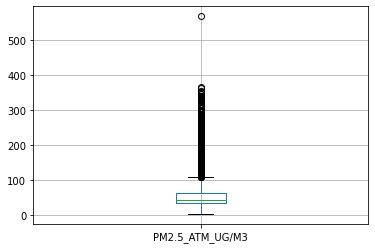

In [25]:
df2.boxplot('PM2.5_ATM_UG/M3')

<AxesSubplot:>

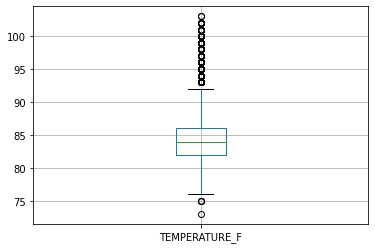

In [26]:
df.boxplot('TEMPERATURE_F')

<AxesSubplot:>

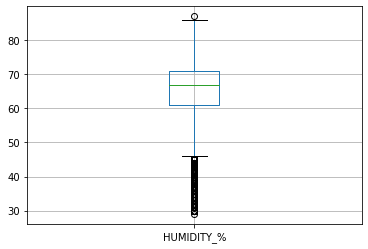

In [27]:
df.boxplot('HUMIDITY_%')

array([[<AxesSubplot:title={'center':'PM2.5_ATM_UG/M3'}>]], dtype=object)

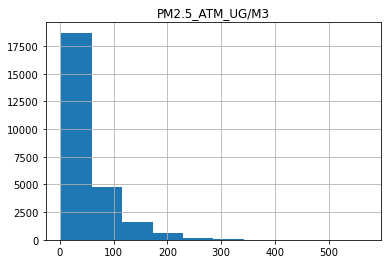

In [28]:
df.hist('PM2.5_ATM_UG/M3')

array([[<AxesSubplot:title={'center':'TEMPERATURE_F'}>]], dtype=object)

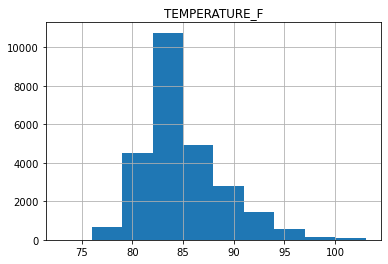

In [43]:
df.hist('TEMPERATURE_F')

array([[<AxesSubplot:title={'center':'HUMIDITY_%'}>]], dtype=object)

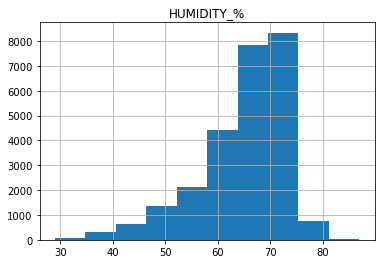

In [29]:
df.hist('HUMIDITY_%')

In [30]:
Q1 =df2['PM2.5_ATM_UG/M3'].quantile(0.25)
Q3 =df2['PM2.5_ATM_UG/M3'].quantile(0.75)
Q1,Q3

(33.78, 64.3)

In [31]:
IQR = Q3-Q1
IQR

30.519999999999996

In [32]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-11.999999999999993, 110.07999999999998)

In [37]:
df2[(df2['PM2.5_ATM_UG/M3']<lower_limit)|(df2['PM2.5_ATM_UG/M3']>upper_limit)]


,ENTRY_DATE,TEMPERATURE_F,HUMIDITY_%,PM2.5_ATM_UG/M3
ENTRY_ID,,,,
333,26-Jul-21,84,58,113.85
334,26-Jul-21,84,58,117.21
335,26-Jul-21,84,58,117.71
336,26-Jul-21,84,58,116.68
337,26-Jul-21,84,58,128.42
...,...,...,...,...
25919,03-Sep-21,82,70,167.05
25920,03-Sep-21,82,70,154.68
25922,03-Sep-21,82,70,365.43


In [36]:
df_no_outliers= df2[(df2['PM2.5_ATM_UG/M3']>lower_limit)&(df2['PM2.5_ATM_UG/M3']<upper_limit)]
df_no_outliers


,ENTRY_DATE,TEMPERATURE_F,HUMIDITY_%,PM2.5_ATM_UG/M3
ENTRY_ID,,,,
198,26-Jul-21,89,50,40.78
199,26-Jul-21,89,50,40.09
200,26-Jul-21,89,50,37.93
201,26-Jul-21,89,50,33.18
202,26-Jul-21,89,50,37.84
...,...,...,...,...
26122,03-Sep-21,78,70,35.43
26123,03-Sep-21,78,70,36.55
26124,03-Sep-21,79,70,38.28


In [39]:
df2.nunique()

 ENTRY_DATE          40
TEMPERATURE_F        30
HUMIDITY_%           59
PM2.5_ATM_UG/M3    9569
dtype: int64